In [1]:
using CSV
using DataFrames
using DataWrangler

In [2]:
unfilteredData = DataFrame(CSV.File("../../Data/Dataset/processedKaggle.csv"))
times = unfilteredData[!,:datetime]

function extractDate(x)
    if x === missing
        return "nodate"
    end
    m = match(r"(?<date>\d{4}-\d{2}-\d{2}) .*",x)
    if m == nothing
        return "nodate"    
    else
        return m[:date]
    end
end
dates = map(x->extractDate(x), times)
insertcols!(unfilteredData,:datetime,:date=>dates)

10365152×7 DataFrame
      Row │ ip              request                            useragent       ⋯
          │ String15        String?                            String?         ⋯
──────────┼─────────────────────────────────────────────────────────────────────
        1 │ 54.36.149.41    GET /filter/27|13%20%D9%85%DA%AF…  Mozilla/5.0 (co ⋯
        2 │ 31.56.96.51     GET /image/60844/productModel/20…  Mozilla/5.0 (Li
        3 │ 31.56.96.51     GET /image/61474/productModel/20…  Mozilla/5.0 (Li
        4 │ 40.77.167.129   GET /image/14925/productModel/10…  Mozilla/5.0 (co
        5 │ 91.99.72.15     GET /product/31893/62100/%D8%B3%…  Mozilla/5.0 (Wi ⋯
        6 │ 40.77.167.129   GET /image/23488/productModel/15…  Mozilla/5.0 (co
        7 │ 40.77.167.129   GET /image/45437/productModel/15…  Mozilla/5.0 (co
        8 │ 40.77.167.129   GET /image/576/article/100x100 H…  Mozilla/5.0 (co
        9 │ 66.249.66.194   GET /filter/b41,b665,c150%7C%D8%…  Mozilla/5.0 (co ⋯
       10 │ 40.77.167.129   GET /image/57710/productModel/10…  Mozilla/5.0 (co
       11 │ 207.46.13.136   GET /product/10214 HTTP/1.1        Mozilla/5.0 (co
    ⋮     │       ⋮                         ⋮                                  ⋱
 10365143 │ 109.125.169.52  GET / HTTP/1.1                     Mozilla/5.0 (Wi
 10365144 │ 5.113.60.62     GET /static/images/amp/instagram…  Mozilla/5.0 (Li ⋯
 10365145 │ 5.113.60.62     GET /static/images/amp/telegram.…  Mozilla/5.0 (Li
 10365146 │ 5.113.60.62     GET /static/images/amp/blog.png …  Mozilla/5.0 (Li
 10365147 │ 5.113.60.62     GET /static/images/amp/third-par…  Mozilla/5.0 (Li
 10365148 │ 188.229.21.56   GET /content/view/shoppingRules …  Mozilla/5.0 (Li ⋯
 10365149 │ 5.127.220.71    GET /apple-touch-icon-120x120.pn…  MobileSafari/60
 10365150 │ 5.213.7.50      GET /m/product/18962/%D8%BA%D8%B…  Mozilla/5.0 (iP
 10365151 │ 109.125.169.52  GET /image/%7B%7BbasketItem.id%7…  Mozilla/5.0 (Wi
 10365152 │ 37.129.59.160   GET /basket/view HTTP/1.1          Mozilla/5.0 (Li ⋯
                                             5 columns and 10365131 rows omitted

In [3]:
function filterOut(x)
    if x === missing
        return false
    end
    if occursin(r"(/static/|/image/|/settings/logo|[.](png|jpg|css|js|ico))",x) || occursin(r"HEAD",x)
        return false
    else
        return true
    end
end

fullData = subset(unfilteredData, :request => ByRow(x->passmissing(filterOut)(x)), skipmissing=true)

2053481×7 DataFrame
     Row │ ip               request                            useragent       ⋯
         │ String15         String?                            String?         ⋯
─────────┼──────────────────────────────────────────────────────────────────────
       1 │ 54.36.149.41     GET /filter/27|13%20%D9%85%DA%AF…  Mozilla/5.0 (co ⋯
       2 │ 91.99.72.15      GET /product/31893/62100/%D8%B3%…  Mozilla/5.0 (Wi
       3 │ 66.249.66.194    GET /filter/b41,b665,c150%7C%D8%…  Mozilla/5.0 (co
       4 │ 207.46.13.136    GET /product/10214 HTTP/1.1        Mozilla/5.0 (co
       5 │ 178.253.33.51    GET /m/product/32574/62991/%D9%8…  Mozilla/5.0 (Li ⋯
       6 │ 91.99.72.15      GET /product/10075/13903/%D9%85%…  Mozilla/5.0 (X1
       7 │ 207.46.13.136    GET /product/14926 HTTP/1.1        Mozilla/5.0 (co
       8 │ 66.249.66.194    GET /m/filter/b2,p6 HTTP/1.1       Mozilla/5.0 (Li
       9 │ 91.99.72.15      GET /product/32798/63266/%DB%8C%…  Mozilla/5.0 (X1 ⋯
      10 │ 66.249.66.91     GET /filter/b874%2Cb32%2Cb63%2Cb…  Mozilla/5.0 (co
      11 │ 5.78.198.52      GET /m/product/33978/64784/%DA%A…  Mozilla/5.0 (Li
    ⋮    │        ⋮                         ⋮                                  ⋱
 2053472 │ 5.120.63.25      GET /m/browse/stove-and-oven HTT…  Mozilla/5.0 (Li
 2053473 │ 66.249.66.194    GET /search/3500/null%2Cb245 HTT…  Mozilla/5.0 (co ⋯
 2053474 │ 37.129.59.160    GET /basket/add/62424?mobile=1&a…  Mozilla/5.0 (Li
 2053475 │ 91.99.55.165     GET /m/filter/p2597%2Cb231?page=…  Mozilla/5.0 (Li
 2053476 │ 13.66.139.0      GET /product/29746/%D9%85%D8%A7%…  Mozilla/5.0 (co
 2053477 │ 45.79.177.249    GET /m/browse/evaporative-air-co…  Mozilla/5.0 (iP ⋯
 2053478 │ 109.125.169.52   GET / HTTP/1.1                     Mozilla/5.0 (Wi
 2053479 │ 188.229.21.56    GET /content/view/shoppingRules …  Mozilla/5.0 (Li
 2053480 │ 5.213.7.50       GET /m/product/18962/%D8%BA%D8%B…  Mozilla/5.0 (iP
 2053481 │ 37.129.59.160    GET /basket/view HTTP/1.1          Mozilla/5.0 (Li ⋯
                                              5 columns and 2053460 rows omitted

In [4]:
bots = subset(fullData, :useragent => ByRow(x -> passmissing(occursin)(r"bot", x)), skipmissing=true)

728086×7 DataFrame
    Row │ ip              request                            useragent         ⋯
        │ String15        String?                            String?           ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ 54.36.149.41    GET /filter/27|13%20%D9%85%DA%AF…  Mozilla/5.0 (comp ⋯
      2 │ 66.249.66.194   GET /filter/b41,b665,c150%7C%D8%…  Mozilla/5.0 (comp
      3 │ 207.46.13.136   GET /product/10214 HTTP/1.1        Mozilla/5.0 (comp
      4 │ 207.46.13.136   GET /product/14926 HTTP/1.1        Mozilla/5.0 (comp
      5 │ 66.249.66.194   GET /m/filter/b2,p6 HTTP/1.1       Mozilla/5.0 (Linu ⋯
      6 │ 66.249.66.91    GET /filter/b874%2Cb32%2Cb63%2Cb…  Mozilla/5.0 (comp
      7 │ 207.46.13.136   GET /product/30649?model=60398 H…  Mozilla/5.0 (comp
      8 │ 66.249.66.194   GET /m/browse/gas-heater/%D8%A8%…  Mozilla/5.0 (Linu
      9 │ 66.249.66.194   GET /m/article/608/%D8%B9%D9%84%…  Mozilla/5.0 (Linu ⋯
     10 │ 54.36.149.70    GET /filter/b215,b400,p5686,v1|%…  Mozilla/5.0 (comp
     11 │ 66.249.66.194   GET /product/81900 HTTP/1.1        Mozilla/5.0 (comp
   ⋮    │       ⋮                         ⋮                                  ⋮ ⋱
 728077 │ 40.77.167.122   GET /product/13158 HTTP/1.1        Mozilla/5.0 (comp
 728078 │ 66.249.66.194   GET /m/filter/b1,b105,b143,b148,…  Mozilla/5.0 (Linu ⋯
 728079 │ 207.46.13.96    GET /filter/b2%2Cb268%2Cb703 HTT…  Mozilla/5.0 (comp
 728080 │ 13.66.139.0     GET /product/22837/48495/%D8%A7%…  Mozilla/5.0 (comp
 728081 │ 66.249.66.91    GET /filter/b874%2Cb226%2Cb570%2…  Mozilla/5.0 (comp
 728082 │ 66.249.66.92    GET /filter/b481%2Cb874%2Cb226%2…  Mozilla/5.0 (comp ⋯
 728083 │ 66.249.66.91    GET /filter/b481%2Cb656%2Cb43%2C…  Mozilla/5.0 (comp
 728084 │ 31.184.133.100  GET /filter/b583,b523 HTTP/1.1     Mozilla/5.0 (comp
 728085 │ 66.249.66.194   GET /search/3500/null%2Cb245 HTT…  Mozilla/5.0 (comp
 728086 │ 13.66.139.0     GET /product/29746/%D9%85%D8%A7%…  Mozilla/5.0 (comp ⋯
                                               5 columns and 728065 rows omitted

In [5]:
realUsers = subset(fullData, :useragent => ByRow(x -> !passmissing(occursin)(r"bot", x)), skipmissing=true)

1325395×7 DataFrame
     Row │ ip               request                            useragent       ⋯
         │ String15         String?                            String?         ⋯
─────────┼──────────────────────────────────────────────────────────────────────
       1 │ 91.99.72.15      GET /product/31893/62100/%D8%B3%…  Mozilla/5.0 (Wi ⋯
       2 │ 178.253.33.51    GET /m/product/32574/62991/%D9%8…  Mozilla/5.0 (Li
       3 │ 91.99.72.15      GET /product/10075/13903/%D9%85%…  Mozilla/5.0 (X1
       4 │ 91.99.72.15      GET /product/32798/63266/%DB%8C%…  Mozilla/5.0 (X1
       5 │ 5.78.198.52      GET /m/product/33978/64784/%DA%A…  Mozilla/5.0 (Li ⋯
       6 │ 91.99.72.15      GET /product/7793/9663/%D9%85%D8…  Mozilla/5.0 (X1
       7 │ 34.247.132.53    GET / HTTP/1.1                     Mozilla/5.0 (Wi
       8 │ 5.78.198.52      POST /m/updateVariation?__amp_so…  Mozilla/5.0 (Li
       9 │ 5.78.198.52      POST /m/updateVariation?__amp_so…  Mozilla/5.0 (Li ⋯
      10 │ 66.111.54.249    GET /m/filter/b1%2Cp1?page=1 HTT…  Mozilla/5.0 (Li
      11 │ 5.78.198.52      POST /m/updateVariation?__amp_so…  Mozilla/5.0 (Li
    ⋮    │        ⋮                         ⋮                                  ⋱
 1325386 │ 5.213.7.50       GET /product/18962/%D8%BA%D8%B0%…  Mozilla/5.0 (iP
 1325387 │ 180.94.84.225    GET /amp-helper-frame.html?appId…  Mozilla/5.0 (Li ⋯
 1325388 │ 5.120.63.25      GET /m/browse/stove-and-oven HTT…  Mozilla/5.0 (Li
 1325389 │ 37.129.59.160    GET /basket/add/62424?mobile=1&a…  Mozilla/5.0 (Li
 1325390 │ 91.99.55.165     GET /m/filter/p2597%2Cb231?page=…  Mozilla/5.0 (Li
 1325391 │ 45.79.177.249    GET /m/browse/evaporative-air-co…  Mozilla/5.0 (iP ⋯
 1325392 │ 109.125.169.52   GET / HTTP/1.1                     Mozilla/5.0 (Wi
 1325393 │ 188.229.21.56    GET /content/view/shoppingRules …  Mozilla/5.0 (Li
 1325394 │ 5.213.7.50       GET /m/product/18962/%D8%BA%D8%B…  Mozilla/5.0 (iP
 1325395 │ 37.129.59.160    GET /basket/view HTTP/1.1          Mozilla/5.0 (Li ⋯
                                              5 columns and 1325374 rows omitted

In [6]:
groupByIP = groupby(realUsers,:ip)
ipCount = combine(groupByIP, nrow => :count)
highUsers = filter(row-> row.count>600, ipCount)
highUserSet = Set(highUsers[!,:ip])
groupByIPfiltered = filter(:ip=>x->x[1] in highUserSet, groupByIP)

GroupedDataFrame with 57 groups based on key: ip
First Group (38694 rows): ip = "91.99.72.15"
   Row │ ip           request                            useragent             ⋯
       │ String15     String?                            String?               ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ 91.99.72.15  GET /product/31893/62100/%D8%B3%…  Mozilla/5.0 (Windows  ⋯
     2 │ 91.99.72.15  GET /product/10075/13903/%D9%85%…  Mozilla/5.0 (X11; Lin
     3 │ 91.99.72.15  GET /product/32798/63266/%DB%8C%…  Mozilla/5.0 (X11; Lin
     4 │ 91.99.72.15  GET /product/7793/9663/%D9%85%D8…  Mozilla/5.0 (X11; Lin
     5 │ 91.99.72.15  GET /product/29080?model=58289 H…  Mozilla/5.0 (X11; Lin ⋯
     6 │ 91.99.72.15  GET /product/30472/60169/%D8%B9%…  Mozilla/5.0 (Windows
     7 │ 91.99.72.15  GET /product/14496/25676/%D8%B3%…  Mozilla/5.0 (Windows
     8 │ 91.99.72.15  GET /product/21891/46412/%D8%B5%…  Mozilla/5.0 (Macintos
     9 │ 91.99.72.15  GET /product/32257/62557/%D8%B9%…  Mozilla/5.0 (Macintos ⋯
    10 │ 91.99.72.15  GET /product/2623?model=2699 HTT…  Mozilla/5.0 (Windows
    11 │ 91.99.72.15  GET /product/32718/63159/%D8%AA%…  Mozilla/5.0 (Macintos
   ⋮   │      ⋮                       ⋮                                  ⋮     ⋱
 38684 │ 91.99.72.15  GET /product/32541/62934/%D8%B3%…  Mozilla/5.0 (Windows
 38685 │ 91.99.72.15  GET /product/14702/26460/%D8%AC%…  Mozilla/5.0 (Macintos ⋯
 38686 │ 91.99.72.15  GET /product/7085?model=8538 HTT…  Mozilla/5.0 (Windows
 38687 │ 91.99.72.15  GET /product/34174/65149/%D8%AA%…  Mozilla/5.0 (Macintos
 38688 │ 91.99.72.15  GET /product/31632/61719/%D8%B1%…  Mozilla/5.0 (Macintos
 38689 │ 91.99.72.15  GET /product/34388/65375/%DB%8C%…  Mozilla/5.0 (Macintos ⋯
 38690 │ 91.99.72.15  GET /product/31639/61730/%D9%85%…  Mozilla/5.0 (Macintos
 38691 │ 91.99.72.15  GET /product/28348/57171/%D8%A7%…  Mozilla/5.0 (X11; Lin
 38692 │ 91.99.72.15  GET /product/32044/62282/%D9%81%…  Mozilla/5.0 (Windows
 38693 │ 91.99.72.15  GET /product/32492/62862/%D8%B3%…  Mozilla/5.0 (X11; Lin ⋯
 38694 │ 91.99.72.15  GET /product/32772/63222/%D8%AA%…  Mozilla/5.0 (Windows
                                                5 columns and 38672 rows omitted
⋮
Last Group (989 rows): ip = "2.176.138.136"
 Row │ ip             request                            useragent             ⋯
     │ String15       String?                            String?               ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2.176.138.136  GET / HTTP/1.1                     Mozilla/5.0 (Windows  ⋯
   2 │ 2.176.138.136  GET /site/enamad HTTP/1.1          Mozilla/5.0 (Windows
   3 │ 2.176.138.136  GET /site/alexaGooleAnalitic HTT…  Mozilla/5.0 (Windows
   4 │ 2.176.138.136  POST /orderAdministration/editin…  Mozilla/5.0 (Windows
   5 │ 2.176.138.136  GET /orderAdministration/console…  Mozilla/5.0 (Windows  ⋯
   6 │ 2.176.138.136  POST /orderAdministration/act/18…  Mozilla/5.0 (Windows
   7 │ 2.176.138.136  GET /province/getProvinceCities?…  Mozilla/5.0 (Windows
   8 │ 2.176.138.136  POST /orderAdministration/saveAc…  Mozilla/5.0 (Windows
   9 │ 2.176.138.136  GET /orderAdministration/act/188…  Mozilla/5.0 (Windows  ⋯
  10 │ 2.176.138.136  GET /province/getProvinceCities?…  Mozilla/5.0 (Windows
  11 │ 2.176.138.136  POST /orderAdministration/saveAc…  Mozilla/5.0 (Windows
  ⋮  │       ⋮                        ⋮                                  ⋮     ⋱
 979 │ 2.176.138.136  POST /orderAdministration/list/c…  Mozilla/5.0 (Windows
 980 │ 2.176.138.136  GET /rapidGrails/jsonList?maxCol…  Mozilla/5.0 (Windows  ⋯
 981 │ 2.176.138.136  POST /orderAdministration/list/c…  Mozilla/5.0 (Windows
 982 │ 2.176.138.136  GET /rapidGrails/jsonList?maxCol…  Mozilla/5.0 (Windows
 983 │ 2.176.138.136  POST /orderAdministration/act/18…  Mozilla/5.0 (Windows
 984 │ 2.176.138.136  GET /province/getProvinceCities?…  Mozilla/5.0 (Windows  ⋯
 985 │ 2.176.138.136  POST /orderAdministration

In [7]:
function getIpGraphs(groupedDf)
    ipGraphs = Dict()

    for g in groupedDf
        weightedGraph = Dict()

        firstRequest = true
        prevReq = ""
        ip = ""
        for rec in eachrow(g)
            if firstRequest
                firstRequest = false
                ip = rec[:ip]
                continue
            end
            edge = rec[:request] => prevReq
            count = get!(weightedGraph,edge, 0)  
            weightedGraph[edge] = count+1
            prevReq = rec[:request]
        end

        sortedGraph = sort(collect(weightedGraph), by=x->x[2], rev=true)

        source = map(x ->first(first(x)), sortedGraph)
        dest = map(x ->last(first(x)), sortedGraph)
        weight = map(x ->last(x), sortedGraph)

        graphDf = DataFrame(source=source, destination=dest, weight=weight)

        insertcols!(graphDf,:weight,:normWeights=>boxcox(graphDf[!,:weight])[:x])

        ipGraphs[ip] = graphDf
    end
    return ipGraphs
end

getIpGraphs (generic function with 1 method)

In [8]:
ipGraphsuser = getIpGraphs(groupByIPfiltered)

Dict{Any, Any} with 57 entries:
  "162.223.91.56"   => 2771×4 DataFrame…
  "77.247.181.162"  => 862×4 DataFrame…
  "134.19.177.22"   => 1099×4 DataFrame…
  "195.176.3.19"    => 793×4 DataFrame…
  "5.78.245.232"    => 744×4 DataFrame…
  "148.251.133.251" => 902×4 DataFrame…
  "212.80.0.3"      => 362×4 DataFrame…
  "134.19.177.20"   => 1432×4 DataFrame…
  "34.247.132.53"   => 2×4 DataFrame…
  "94.183.36.205"   => 192×4 DataFrame…
  "89.196.167.216"  => 511×4 DataFrame…
  "116.203.60.232"  => 998×4 DataFrame…
  "91.99.119.66"    => 754×4 DataFrame…
  "82.102.23.165"   => 713×4 DataFrame…
  "91.99.72.148"    => 529×4 DataFrame…
  "207.244.70.35"   => 616×4 DataFrame…
  "130.185.74.243"  => 1882×4 DataFrame…
  "104.222.32.84"   => 2263×4 DataFrame…
  "213.233.175.195" => 672×4 DataFrame…
  "195.176.3.24"    => 683×4 DataFrame…
  "172.20.2.174"    => 10×4 DataFrame…
  "195.206.105.217" => 1131×4 DataFrame…
  "172.104.154.208" => 750×4 DataFrame…
  "95.216.95.200"   => 501×4 DataFrame…
  "5.

In [9]:
serverGraph = Dict()
serverDf = DataFrame(CSV.File("../../Data/Graph/allWeightedGraph.csv"))
for row in eachrow(serverDf)
    serverGraph[row.source=>row.destination] = row.weight
end

In [10]:
function ipGraphSimilarity(gDf)
    edgeWeightDict = Dict()
    for row in eachrow(gDf)
        edgeWeightDict[row.source=>row.destination] = row.weight
    end
    
    numEdges = 0
    similaritySum = 0
    for (edge, weight) in pairs(edgeWeightDict)
        serverWeight = get(serverGraph, edge, 0)
        similaritySum +=  serverWeight*weight
        numEdges += 1
    end
    return similaritySum/numEdges^2
end

ipGraphSimilarity (generic function with 1 method)

In [11]:
similarityResultsUser = Dict()
for (ipaddr, df) in pairs(ipGraphsuser)
    similarityResultsUser[ipaddr] =  ipGraphSimilarity(df)
end

In [12]:
simUserDf = DataFrame(:ip=>collect(keys(similarityResultsUser)),:score=>collect(values(similarityResultsUser)))
sort!(simUserDf, :score)
CSV.write("../../Data/Graph/userSim.csv", simUserDf)

"../../Data/Graph/userSim.csv"

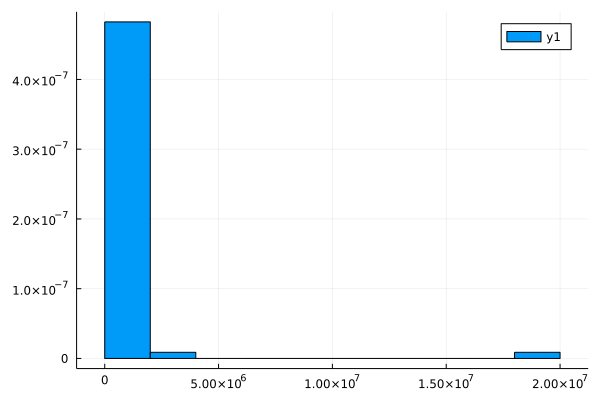

In [13]:
using Plots
gr()
histogram(sort(collect(values(similarityResultsUser))),bins = :scott, normalize=true)

In [14]:
groupByIPbot = groupby(bots,:ip)
ipCountbot = combine(groupByIPbot, nrow => :count)
highUsersbot = filter(row-> row.count>1000, ipCountbot)
highUserSetbot = Set(highUsersbot[!,:ip])
groupByIPfilteredbot = filter(:ip=>x->x[1] in highUserSetbot, groupByIPbot)

GroupedDataFrame with 57 groups based on key: ip
First Group (348798 rows): ip = "66.249.66.194"
    Row │ ip             request                            useragent          ⋯
        │ String15       String?                            String?            ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ 66.249.66.194  GET /filter/b41,b665,c150%7C%D8%…  Mozilla/5.0 (compa ⋯
      2 │ 66.249.66.194  GET /m/filter/b2,p6 HTTP/1.1       Mozilla/5.0 (Linux
      3 │ 66.249.66.194  GET /m/browse/gas-heater/%D8%A8%…  Mozilla/5.0 (Linux
      4 │ 66.249.66.194  GET /m/article/608/%D8%B9%D9%84%…  Mozilla/5.0 (Linux
      5 │ 66.249.66.194  GET /product/81900 HTTP/1.1        Mozilla/5.0 (compa ⋯
      6 │ 66.249.66.194  GET /m/filter/b105,b113,b118,b12…  Mozilla/5.0 (Linux
      7 │ 66.249.66.194  GET /product/4057/47/78306 HTTP/…  Mozilla/5.0 (compa
      8 │ 66.249.66.194  GET /m/product/17369/48780/%DB%8…  Mozilla/5.0 (Linux
      9 │ 66.249.66.194  GET /m/filter/b1,b103,b126,b136,…  Mozilla/5.0 (Linux ⋯
     10 │ 66.249.66.194  GET /product/34024/64843/%DB%8C%…  Mozilla/5.0 (compa
     11 │ 66.249.66.194  GET /m/product/31479/61477/%DA%A…  Mozilla/5.0 (Linux
   ⋮    │       ⋮                        ⋮                                  ⋮  ⋱
 348788 │ 66.249.66.194  GET /m/filter/b1,p65 HTTP/1.1      Mozilla/5.0 (Linux
 348789 │ 66.249.66.194  GET /m/filter/b74 HTTP/1.1         Mozilla/5.0 (Linux ⋯
 348790 │ 66.249.66.194  GET /m/filter/b443,b714,b742,p22…  Mozilla/5.0 (Linux
 348791 │ 66.249.66.194  GET /m/filter/b1,b105,b143,b148,…  Mozilla/5.0 (Linux
 348792 │ 66.249.66.194  GET /m/filter/b42,p6 HTTP/1.1      Mozilla/5.0 (Linux
 348793 │ 66.249.66.194  GET /m/filter/b103,b105,b126,b13…  Mozilla/5.0 (Linux ⋯
 348794 │ 66.249.66.194  GET /product/11432/17311/%D8%AF%…  Mozilla/5.0 (compa
 348795 │ 66.249.66.194  GET /m/filter/b1,p62 HTTP/1.1      Mozilla/5.0 (Linux
 348796 │ 66.249.66.194  GET /m/filter/b258 HTTP/1.1        Mozilla/5.0 (Linux
 348797 │ 66.249.66.194  GET /m/filter/b1,b105,b143,b148,…  Mozilla/5.0 (Linux ⋯
 348798 │ 66.249.66.194  GET /search/3500/null%2Cb245 HTT…  Mozilla/5.0 (compa
                                               5 columns and 348776 rows omitted
⋮
Last Group (1017 rows): ip = "207.46.13.102"
  Row │ ip             request                            useragent            ⋯
      │ String15       String?                            String?              ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 207.46.13.102  GET /product/19179/%D9%82%D8%B1%…  Mozilla/5.0 (iPhone; ⋯
    2 │ 207.46.13.102  GET /filter/b135,b597,b6 HTTP/1.1  Mozilla/5.0 (compati
    3 │ 207.46.13.102  GET /filter/b131,b2,p38 HTTP/1.1   Mozilla/5.0 (compati
    4 │ 207.46.13.102  GET /filter/b1,p41,stexists HTTP…  Mozilla/5.0 (compati
    5 │ 207.46.13.102  GET /filter/b121%2Cb7%2Cb83 HTTP…  Mozilla/5.0 (compati ⋯
    6 │ 207.46.13.102  GET /filter/b109,b124,b135,b42,b…  Mozilla/5.0 (compati
    7 │ 207.46.13.102  GET /product/13030/%D8%AE%D9%88%…  Mozilla/5.0 (iPhone;
    8 │ 207.46.13.102  GET /filter/b1,b142,b145,b2,b614…  Mozilla/5.0 (compati
    9 │ 207.46.13.102  GET /filter/b1,b145,b2,b36,b42,b…  Mozilla/5.0 (compati ⋯
   10 │ 207.46.13.102  GET /filter/b1%2Cb140%2Cb142 HTT…  Mozilla/5.0 (compati
   11 │ 207.46.13.102  GET /filter/b136,b497,b523 HTTP/…  Mozilla/5.0 (compati
  ⋮   │       ⋮                        ⋮                                  ⋮    ⋱
 1007 │ 207.46.13.102  GET /filter/b168,b497 HTTP/1.1     Mozilla/5.0 (compati
 1008 │ 207.46.13.102  GET /filter/b111,b148,b168,b41,b…  Mozilla/5.0 (compati ⋯
 1009 │ 207.46.13.102  GET /filter/b132,b212,b484,b584,…  Mozilla/5.0 (compati
 1010 │ 207.46.13.102  GET /filter/b126,b215,b3 HTTP/1.1  Mozilla/5.0 (compati
 1011 │ 207.46.13.102  GET /filter/b1%2Cb169%2Cb333 HTT…  Mozilla/5.0 (compati
 1012 │ 207.46.13.102  GET /product/30394/%D8%B9%D8%B7%…  Mozilla/5.0 (compati ⋯
 1013 │ 207.46.13.102  G

In [15]:
ipGraphsbot = getIpGraphs(groupByIPfilteredbot)

similarityResultsBot = Dict()
for (ipaddr, df) in pairs(ipGraphsbot)
    similarityResultsBot[ipaddr] =  ipGraphSimilarity(df)
end

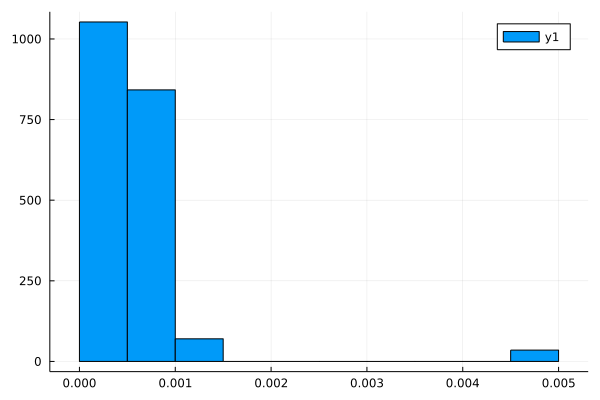

In [16]:
histogram(sort(collect(values(similarityResultsBot))),bins = :scott, normalize=true)

In [17]:
botUserDf = DataFrame(:ip=>collect(keys(similarityResultsBot)),:score=>collect(values(similarityResultsBot)))
sort!(botUserDf, :score)
CSV.write("../../Data/Graph/botSim.csv", botUserDf)

"../../Data/Graph/botSim.csv"

In [18]:
selectGroup = filter(:ip=>x->x[1]=="5.160.157.20",groupByIPfiltered)
println(nrow(selectGroup[1]))
println(nrow(unique(selectGroup[1],:request)))

13526
355


In [19]:
non_prod = filter(x->occursin(r"product",x.request), unique(selectGroup[1],:request))
show(unique(selectGroup[1],:request))
show(non_prod)
show(nrow(non_prod))

355×7 DataFrame
 Row │ ip            request                            useragent              ⋯
     │ String15      String?                            String?                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 5.160.157.20  GET /browse/blu-ray HTTP/1.1       Mozilla/5.0 (Windows N ⋯
   2 │ 5.160.157.20  GET /filter?f=p12129&page=21 HTT…  Mozilla/5.0 (Windows N
   3 │ 5.160.157.20  GET /filter?f=p12250&page=2 HTTP…  Mozilla/5.0 (Windows N
   4 │ 5.160.157.20  GET /filter?f=p53,b19&o=b&page=1…  Mozilla/5.0 (Windows N
   5 │ 5.160.157.20  GET /filter?f=p12129&page=14 HTT…  Mozilla/5.0 (Windows N ⋯
   6 │ 5.160.157.20  GET /filter?f=p12129&page=19 HTT…  Mozilla/5.0 (Windows N
   7 │ 5.160.157.20  GET /browse/mony-numerator HTTP/…  Mozilla/5.0 (Windows N
   8 │ 5.160.157.20  GET /filter?f=p69&page=5 HTTP/1.1  Mozilla/5.0 (Windows N
   9 │ 5.160.157.20  GET /filter?page=1&f=p17586 HTTP…  Mozilla/5.0 (Windows N ⋯
  10 │ 5.160.157.20  GET